# Bigfoot Data Project

![Getting Started](images/cool_pic.png)

### Libraries Needed

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read in CSV code

In [12]:
df = pd.read_csv('data_main/merged_data.csv').drop(columns=['count', 'observed','location_details', 'title', 'pressure', 'summary', 'uv_index', 'visibility', 'wind_bearing','wind_speed', 'temperature_mid', 'dew_point','humidity','cloud_cover','precip_intensity','precip_probability','precip_type', 'latitude', 'longitude', 'geohash'])	

The head/tail code below allows us to make sure it's reading our entire document. When you return this text it looks like a mess for the head. Columns B and C, 'observed' and 'location_details' respectively contain text descriptions, basically anecdotes about what was seen and what the scene looked like. These columns are dropped from the dataframe as they hae no use for our purposes. This was done in the first instance of reading the csv via .drop(columns=) 

In [13]:
df.head(10)

,county,state,season,day_of_the_week,date,year,temperature_high,temperature_low,moon_phase
0,Winston County,Alabama,Summer,Wednesday,10-Nov,2021.0,NaN,NaN,1.00
1,Valdez-Chitina-Whittier County,Alaska,Fall,Saturday,23-Nov,2021.0,NaN,NaN,0.99
2,Washington County,Rhode Island,Fall,Sunday,23-Nov,2021.0,78.17,68.68,0.99
3,York County,Pennsylvania,Summer,Monday,23-Nov,2021.0,NaN,NaN,0.99
4,Yamhill County,Oregon,Spring,Sunday,23-Nov,2021.0,NaN,NaN,0.99
5,Washita County,Oklahoma,Fall,Monday,23-Nov,2021.0,71.86,50.99,0.99
6,Washington County,Ohio,Summer,Monday,23-Nov,2021.0,NaN,NaN,0.99
7,Westchester County,New York,Fall,Saturday,23-Oct,2021.0,92.24,69.38,0.99
8,Washoe County,Nevada,Fall,Saturday,23-Oct,2021.0,NaN,NaN,0.99
9,Warren County,New Jersey,Fall,Friday,23-Oct,2021.0,NaN,NaN,0.99


In [14]:
df.tail(5)

,county,state,season,day_of_the_week,date,year,temperature_high,temperature_low,moon_phase
14751,Rio Arriba County,New Mexico,Summer,NaN,NaN,NaN,NaN,NaN,NaN
14752,Prince George's County,Maryland,Spring,NaN,NaN,NaN,NaN,NaN,NaN
14753,Lake County,Florida,Summer,NaN,NaN,NaN,NaN,NaN,NaN
14754,White County,Illinois,Fall,NaN,NaN,NaN,NaN,NaN,NaN
14755,Calhoun County,Illinois,Summer,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning Data
Here we want to manipulate some of this information. We'll start by getting rid of the NaN values that exist in our dataframe.

In [15]:
df.replace(np.NaN, 'No info')

,county,state,season,day_of_the_week,date,year,temperature_high,temperature_low,moon_phase
0,Winston County,Alabama,Summer,Wednesday,10-Nov,2021.0,No info,No info,1.0
1,Valdez-Chitina-Whittier County,Alaska,Fall,Saturday,23-Nov,2021.0,No info,No info,0.99
2,Washington County,Rhode Island,Fall,Sunday,23-Nov,2021.0,78.17,68.68,0.99
3,York County,Pennsylvania,Summer,Monday,23-Nov,2021.0,No info,No info,0.99
4,Yamhill County,Oregon,Spring,Sunday,23-Nov,2021.0,No info,No info,0.99
...,...,...,...,...,...,...,...,...,...
14751,Rio Arriba County,New Mexico,Summer,No info,No info,No info,No info,No info,No info
14752,Prince George's County,Maryland,Spring,No info,No info,No info,No info,No info,No info
14753,Lake County,Florida,Summer,No info,No info,No info,No info,No info,No info
14754,White County,Illinois,Fall,No info,No info,No info,No info,No info,No info


Then here we are converting our column moon_phase, which shows the fullness of the moon, 0.01 is very crescent, 1 is a full moon, into a percentage I think that's easier to understand

In [16]:
df['moon_phase'].map(lambda n: '{:,.2%}'.format(n))

0        100.00%
1         99.00%
2         99.00%
3         99.00%
4         99.00%
          ...   
14751       nan%
14752       nan%
14753       nan%
14754       nan%
14755       nan%
Name: moon_phase, Length: 14756, dtype: object

### Getting county information

In [18]:
df['county'].describe()

count             10042
unique             1037
top       Pierce County
freq                152
Name: county, dtype: object

### Using functions from the statistics module to get information

In [19]:
df['temperature_high'].mean()

67.11769322947875

In [20]:
df['temperature_low'].mean()

48.638767638758274

In [21]:
df['moon_phase'].mode()

0    0.58
Name: moon_phase, dtype: float64

# The Visuals 

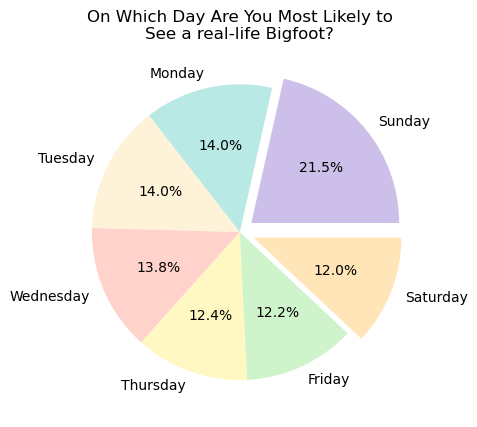

In [23]:
y = df['day_of_the_week'].value_counts(normalize=True) * 100
colors = ["#CCBFE9", "#B8E9E4", "#FEF3D8", "#FFD3CC", "#FFF8C2", "#CFF3CA" ,"#FFE5B8"]
mylabels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
myexplode = [0.1, 0, 0, 0, 0, 0, 0.1]
plt.pie(y, labels = mylabels,explode=myexplode, autopct='%1.1f%%', colors=colors)
plt.title("On Which Day Are You Most Likely to\n" + "See a real-life Bigfoot?")
plt.show()  

This pie chart shows us that you are scientifically most likely to encounter Bigfoot on a Sunday. Presently we are unsure whether to interpret 
this as a consequence of any religious affiliation that the mysterious crypitd might have, but with more studies that may be determined. Saturday
is the day you are least likely to encounter such a creature. This may be due to any number of factors, but we suspect self-care is a common practice
in the sasquatch community. 

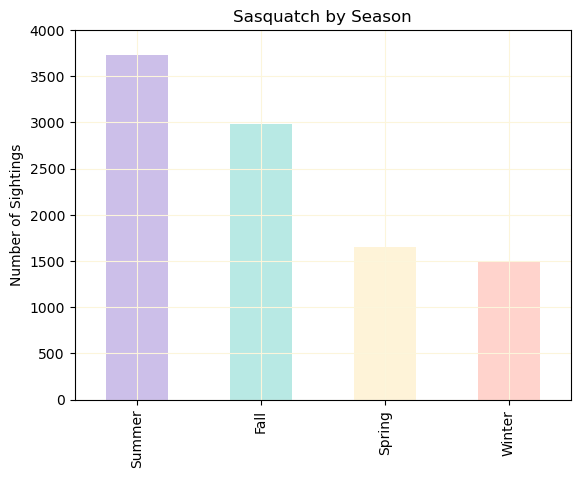

In [24]:
season_data = df['season'].value_counts().drop('Unknown').plot.bar(color=colors)
plt.ylabel("Number of Sightings")
plt.ylim(0, 4000)
plt.title("Sasquatch by Season")
plt.grid(True, color='#FCF5DB')
plt.show()

This bar chart attempts to show, in wonderful pastel colors, during which season Bigfoot is most likely to be spotted. It appears from our rigorous 
collection and analysis that this is most likely to occur in the Summer months. Based on this research, it is likely that Bigfoot is a "Sun's out, guns out' 
type of guy, a proper chill dude. The winter is the least likely month to spot one of these guys. The only logical possible explanation for this is that Bigfoot
sleeps through most of this time like a bear or something. 

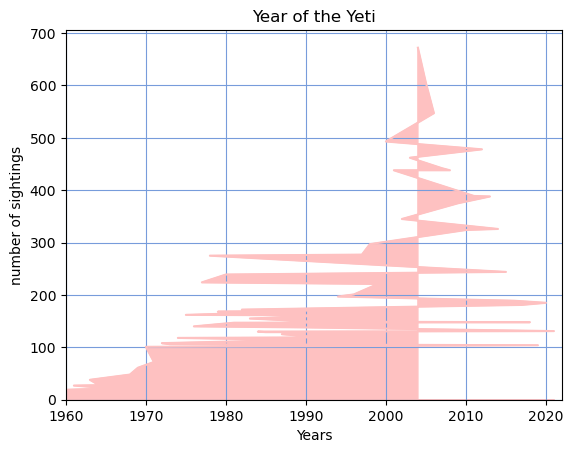

In [25]:
year_data = df['year'].value_counts(ascending=True, sort=True).plot.area(color='#FEC1C1', xlabel='Years', ylabel="number of sightings").set_xlim(1960,2022)
plt.title("Year of the Yeti")
plt.grid(True, color='#779CDB')
plt.show()  

This area graph displays the frequency of sightings over the years. We have data going back to the 19th century, but the bulk of it is from the last 70 or so years. 
This chart seems to say that sightings peaked in the mid 2000's and has fallen since then. The 60's to the 90's show a steady increase in sightings. By the 2010's Bigfoot is 
becoming more difficult to glimpse than the decade prior. The 2020's have seen a return to 90's level encounters. It is speculated that the Sars-CoV-2 pandemic early in this decade 
contributed to scarcity of sighitngs. Professional social-distancers, Sasquatch populations likely were unaffected by the global health emergency. 

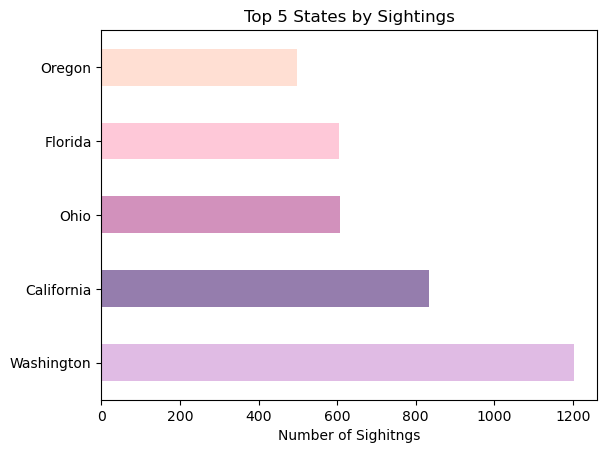

In [26]:
state_data= df['state'].value_counts().nlargest(5).plot.barh(color=["#E0BBE4", "#957DAD", "#D291BC", "#FEC8D8", "#FFDFD3"])
plt.xlabel('Number of Sighitngs')
plt.title('Top 5 States by Sightings')
plt.show()

This chart gives us the most popular states for Bigfoot viewing. The pacific nortwest seems to be a very well-represented region. We have the forests of Washington state in the top spot. Interestingly, Ohio is third most popular, an area that we don't necesserially associate with Bigfoot in the popular imagination. Floida's Skunkape is a Bigfoot variation many don't know about outside the region. This 
version of the cryptid is often said to be sighited in the many bogs and swamps of the American southeast. 

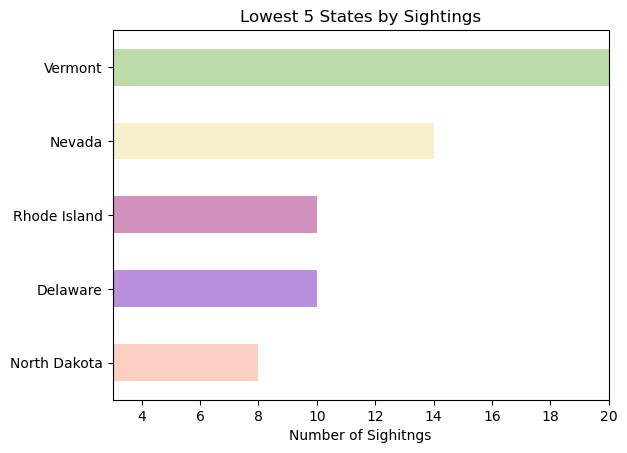

In [27]:
state_data= df['state'].value_counts().nsmallest(5).plot.barh(color=["#FBD0C3", "#BA8FDB", "#D291BC", "#F7F0CC", "#BBDBAB"])
plt.xlabel('Number of Sighitngs')
plt.xlim(3,20)
plt.title('Lowest 5 States by Sightings')
plt.show()

This chart shows us the states where you're least likely to encounter a Sasquatch. Don't buy a plane ticket to North Dakota is you're on the hunt. Of the least represented states, Vermont is your best option, but don't waste your time. 